#### Dataset Information:

This is an educational data set which is collected from learning management system (LMS) called Kalboard 360. Kalboard 360 is a multi-agent LMS, which has been designed to facilitate learning through the use of leading-edge technology. Such system provides users with a synchronous access to educational resources from any device with Internet connection.

The data is collected using a learner activity tracker tool, which called experience API (xAPI). The xAPI is a component of the training and learning architecture (TLA) that enables to monitor learning progress and learner’s actions like reading an article or watching a training video. The experience API helps the learning activity providers to determine the learner, activity and objects that describe a learning experience. The dataset consists of 480 student records and 16 features. The features are classified into three major categories: (1) Demographic features such as gender and nationality. (2) Academic background features such as educational stage, grade Level and section. (3) Behavioral features such as raised hand on class, opening resources, answering survey by parents, and school satisfaction.

The dataset consists of 305 males and 175 females. The students come from different origins such as 179 students are from Kuwait, 172 students are from Jordan, 28 students from Palestine, 22 students are from Iraq, 17 students from Lebanon, 12 students from Tunis, 11 students from Saudi Arabia, 9 students from Egypt, 7 students from Syria, 6 students from USA, Iran and Libya, 4 students from Morocco and one student from Venezuela.

The dataset is collected through two educational semesters: 245 student records are collected during the first semester and 235 student records are collected during the second semester.

The data set includes also the school attendance feature such as the students are classified into two categories based on their absence days: 191 students exceed 7 absence days and 289 students their absence days under 7.

This dataset includes also a new category of features; this feature is parent parturition in the educational process. Parent participation feature have two sub features: Parent Answering Survey and Parent School Satisfaction. There are 270 of the parents answered survey and 210 are not, 292 of the parents are satisfied from the school and 188 are not.

----

#### Attributes
1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

----
#### The students are classified into three numerical intervals based on their total grade/mark:
Low-Level: interval includes values from 0 to 69,

Middle-Level: interval includes values from 70 to 89,

High-Level: interval includes values from 90-100.

----

In [69]:
import numpy as np
import pandas as pd
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV   #Performing grid search
from scipy.stats import skew
from collections import OrderedDict

In [4]:
data = pd.read_csv('E:/Student_Performance/xAPI-Edu-Data.csv')
# Any results you write to the current directory are saved as output.
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


## Checking datasets shape

In [6]:
print(data.shape)

(480, 17)


## Datasets Columns

In [7]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [8]:
data['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

Percentage M    0.635417
F    0.364583
Name: gender, dtype: float64


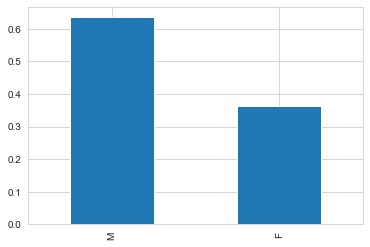

In [9]:
print('Percentage',data.gender.value_counts(normalize=True))
data.gender.value_counts(normalize=True).plot(kind='bar')

Percentage KW             0.372917
Jordan         0.358333
Palestine      0.058333
Iraq           0.045833
lebanon        0.035417
Tunis          0.025000
SaudiArabia    0.022917
Egypt          0.018750
Syria          0.014583
Lybia          0.012500
Iran           0.012500
USA            0.012500
Morocco        0.008333
venzuela       0.002083
Name: NationalITy, dtype: float64


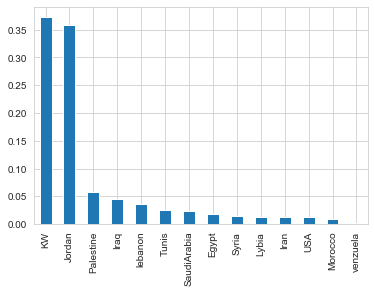

In [10]:
print('Percentage',data.NationalITy.value_counts(normalize=True))
data.NationalITy.value_counts(normalize=True).plot(kind='bar')

Percentage KuwaIT         0.375000
Jordan         0.366667
Iraq           0.045833
lebanon        0.039583
SaudiArabia    0.033333
USA            0.033333
Palestine      0.020833
Egypt          0.018750
Tunis          0.018750
Syria          0.012500
Lybia          0.012500
Iran           0.012500
Morocco        0.008333
venzuela       0.002083
Name: PlaceofBirth, dtype: float64


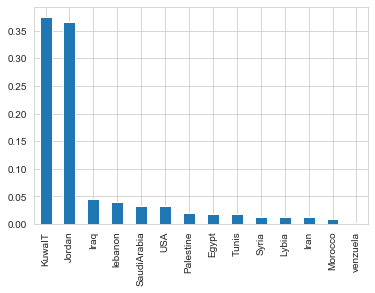

In [12]:
print('Percentage',data.PlaceofBirth.value_counts(normalize=True))
data.PlaceofBirth.value_counts(normalize=True).plot(kind='bar')

Percentage MiddleSchool    0.516667
lowerlevel      0.414583
HighSchool      0.068750
Name: StageID, dtype: float64


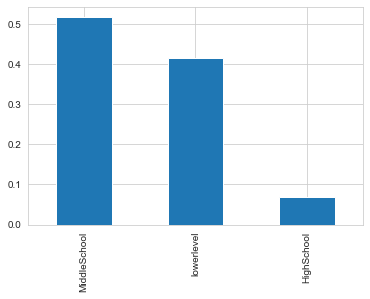

In [13]:
print('Percentage',data.StageID.value_counts(normalize=True))
data.StageID.value_counts(normalize=True).plot(kind='bar')

Percentage G-02    0.306250
G-08    0.241667
G-07    0.210417
G-04    0.100000
G-06    0.066667
G-11    0.027083
G-12    0.022917
G-09    0.010417
G-10    0.008333
G-05    0.006250
Name: GradeID, dtype: float64


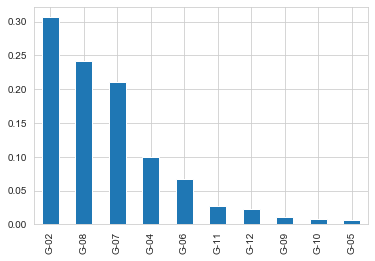

In [14]:
print('Percentage',data.GradeID.value_counts(normalize=True))
data.GradeID.value_counts(normalize=True).plot(kind='bar')

Percentage IT           0.197917
French       0.135417
Arabic       0.122917
Science      0.106250
English      0.093750
Biology      0.062500
Spanish      0.052083
Chemistry    0.050000
Geology      0.050000
Quran        0.045833
Math         0.043750
History      0.039583
Name: Topic, dtype: float64


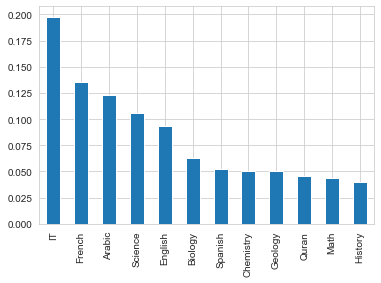

In [15]:
print('Percentage',data.Topic.value_counts(normalize=True))
data.Topic.value_counts(normalize=True).plot(kind='bar')

Parcentage F    0.510417
S    0.489583
Name: Semester, dtype: float64


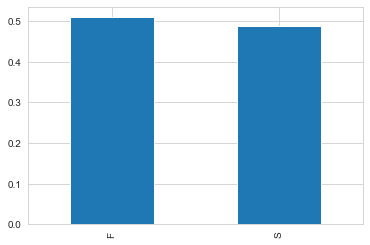

In [17]:
print('Parcentage',data.Semester.value_counts(normalize=True))
data.Semester.value_counts(normalize=True).plot(kind='bar')

Parcentage Father    0.589583
Mum       0.410417
Name: Relation, dtype: float64


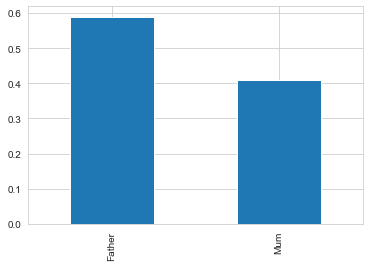

In [18]:
print('Parcentage',data.Relation.value_counts(normalize=True))
data.Relation.value_counts(normalize=True).plot(kind='bar')

In [19]:
color_brewer = ['#41B5A3','#FFAF87','#FF8E72','#ED6A5E','#377771','#E89005','#C6000D','#000000','#05668D','#028090','#9FD35C',
                '#02C39A','#F0F3BD','#41B5A3','#FF6F59','#254441','#B2B09B','#EF3054','#9D9CE8','#0F4777','#5F67DD','#235077','#CCE4F9','#1748D1',
                '#8BB3D6','#467196','#F2C4A2','#F2B1A4','#C42746','#330C25']
fig = {
  "data": [
    {
      "values": data["raisedhands"].value_counts().values,
      "labels": data["raisedhands"].value_counts().index,
      "domain": {"x": [0, .95]},
      "name": "Raisedhands Parcentage",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie",
      "marker": {"colors": [i for i in reversed(color_brewer)]},
      "textfont": {"color": "#FFFFFF"}
    }],
  "layout": {
        "title":"Raisedhands Parcentage",
        "annotations": [
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "Raisedhands Parcentage",
                "x": 0.47,
                "y": 0.5
            }
        ]
    }
}
iplot(fig, filename='donut')

Parcentage Good    0.608333
Bad     0.391667
Name: ParentschoolSatisfaction, dtype: float64


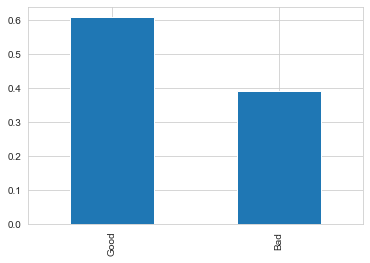

In [20]:
print('Parcentage',data.ParentschoolSatisfaction.value_counts(normalize=True))
data.ParentschoolSatisfaction.value_counts(normalize=True).plot(kind='bar')

Parcentage Yes    0.5625
No     0.4375
Name: ParentAnsweringSurvey, dtype: float64


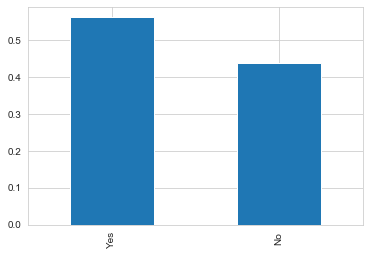

In [21]:
print('Parcentage',data.ParentAnsweringSurvey.value_counts(normalize=True))
data.ParentAnsweringSurvey.value_counts(normalize=True).plot(kind='bar')

Parcentage Under-7    0.602083
Above-7    0.397917
Name: StudentAbsenceDays, dtype: float64


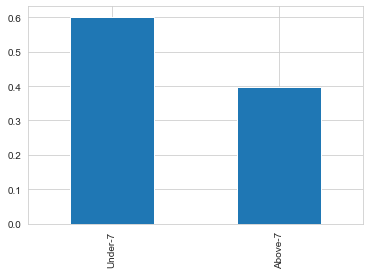

In [22]:
print('Parcentage',data.StudentAbsenceDays.value_counts(normalize=True))
data.StudentAbsenceDays.value_counts(normalize=True).plot(kind='bar')

Parcentage M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64


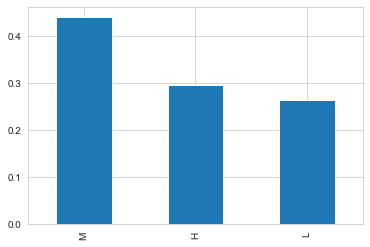

In [23]:
print('Parcentage',data.Class.value_counts(normalize=True))
data.Class.value_counts(normalize=True).plot(kind='bar')

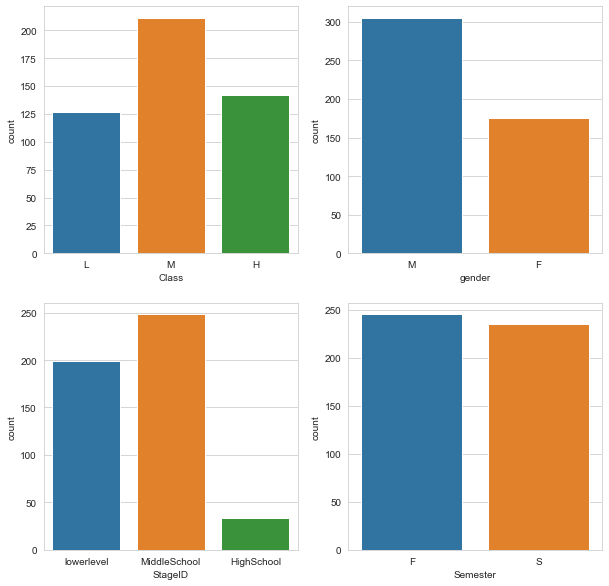

In [24]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', data=data, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID', data=data, ax=axarr[1,0])
sns.countplot(x='Semester', data=data, ax=axarr[1,1])

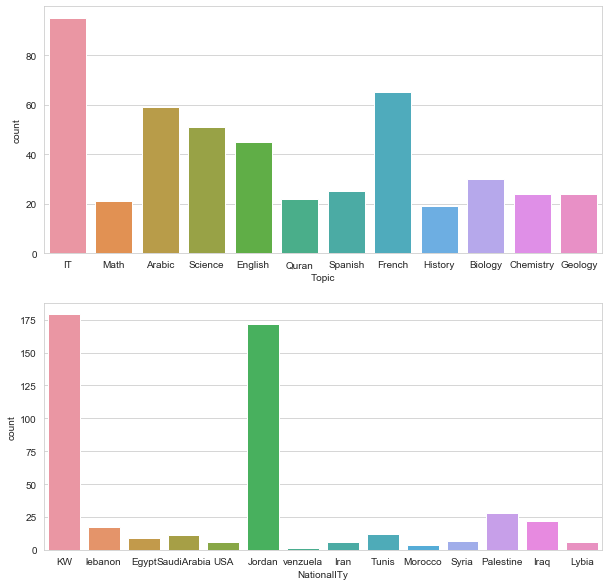

In [25]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', data=data, ax=axis1)
sns.countplot(x='NationalITy', data=data, ax=axis2)

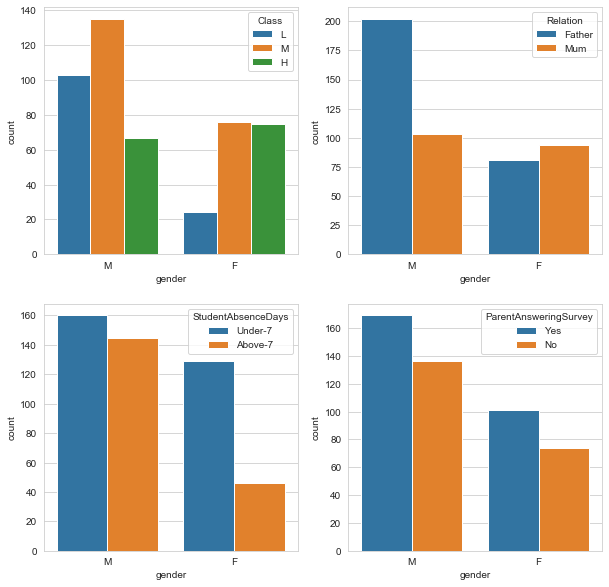

In [26]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='gender', hue='Class', data=data, ax=axarr[0,0], order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender', hue='Relation', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=data, ax=axarr[1,0], order=['M','F'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=data, ax=axarr[1,1], order=['M','F'])

* No apparent gender bias when it comes to subject/topic choices, we cannot conclude that girls performed better because they perhaps took less technical subjects

* Gender disparity holds even at a country level. May just be as a result of the sampling.</p></b>


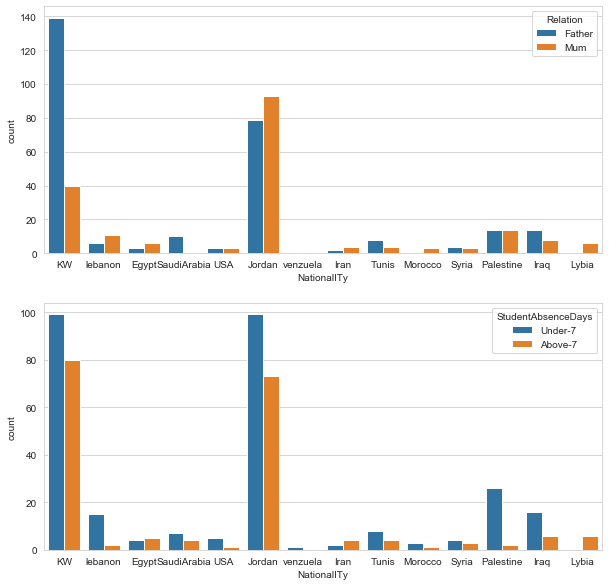

In [28]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='NationalITy', hue='Relation', data=data, ax=axis1)
sns.countplot(x='NationalITy', hue='StudentAbsenceDays', data=data, ax=axis2)

Name: 
Type: Graph
Number of nodes: 16
Number of edges: 26
Average degree:   3.2500


E:\ANACONDA\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



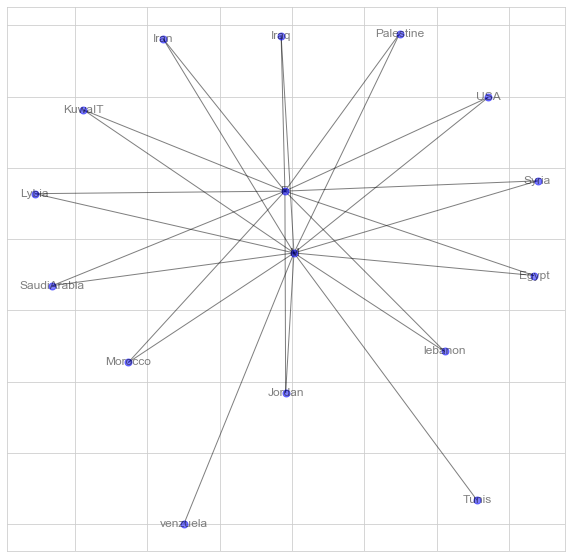

In [29]:
import networkx as nx

g= nx.Graph()
g = nx.from_pandas_edgelist(data,source='gender',target='PlaceofBirth')
print (nx.info(g))


plt.figure(figsize=(10,10)) 
nx.draw_networkx(g,with_labels=True,node_size=50, alpha=0.5, node_color="blue")
plt.show()

1. Gender Encoding

In [30]:
Features = data.drop('gender',axis=1)
Target = data['gender']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

2. Semester Encoding

In [31]:
Features = data.drop('Semester',axis=1)
Target = data['Semester']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

3. ParentAnsweringSurvey Encoding

In [32]:
Features = data.drop('ParentAnsweringSurvey',axis=1)
Target = data['ParentAnsweringSurvey']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

4. Relation Encoding

In [33]:
Features = data.drop('Relation',axis=1)
Target = data['Relation']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

5. ParentschoolSatisfaction Encoding

In [34]:
Features = data.drop('ParentschoolSatisfaction',axis=1)
Target = data['ParentschoolSatisfaction']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

6. StudentAbsenceDays Encoding

In [35]:
Features = data.drop('StudentAbsenceDays',axis=1)
Target = data['StudentAbsenceDays']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])
Cat_Colums

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'Class'],
      dtype='object')

7. Class Encoding

In [36]:
Features = data.drop('Class',axis=1)
Target = data['Class']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])
Cat_Colums

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays'],
      dtype='object')

In [37]:
display(Features)
display(Target)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,3,1,5,0,2,1,0,5,4,5,8,0,0,0
476,0,3,3,1,5,0,5,0,0,50,77,14,28,0,0,1
477,0,3,3,1,5,0,5,1,0,55,74,25,29,0,0,1
478,0,3,3,1,5,0,6,0,0,30,17,14,57,0,0,0


0      M
1      M
2      L
3      L
4      M
      ..
475    L
476    M
477    M
478    L
479    L
Name: Class, Length: 480, dtype: object

## Test and Train Data Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)

### Using Grid Search for KNN

In [73]:
params = {"n_neighbors": np.arange(1, 50, 1),"algorithm" : ["brute"],
         "leaf_size": np.arange(1,20,1), "metric": ["cityblock"]}
print("[INFO] tuning hyperparameters via grid search")
model = KNeighborsClassifier()
grid = GridSearchCV(model, params, n_jobs=-1)
start = time.time()
grid.fit(X_train, y_train)
print("[INFO] grid search took {:.2f} seconds".format(time.time() - start))
acc = grid.score(X_test, y_test)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] grid search best parameters: {}".format(grid.best_params_))
print("------------\n")

[INFO] tuning hyperparameters via grid search


E:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



[INFO] grid search took 6.14 seconds
[INFO] grid search accuracy: 67.71%
[INFO] grid search best parameters: {'algorithm': 'brute', 'leaf_size': 1, 'metric': 'cityblock', 'n_neighbors': 16}
------------



E:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



### Using KNN Classifier

In [74]:
knn = KNeighborsClassifier(n_neighbors=12,leaf_size=1,metric='cityblock',algorithm='brute')
knn_pred = knn.fit(X_train, y_train).predict(X_test)
print (classification_report(y_test,knn_pred))
print("Accuracy = "+str(accuracy_score(y_test,knn_pred)))
print("predicted set")
print(knn_pred)

              precision    recall  f1-score   support

           H       0.86      0.54      0.67        35
           L       0.73      0.86      0.79        22
           M       0.62      0.77      0.69        39

    accuracy                           0.71        96
   macro avg       0.74      0.73      0.72        96
weighted avg       0.74      0.71      0.70        96

Accuracy = 0.7083333333333334
predicted set
['L' 'H' 'L' 'L' 'M' 'L' 'H' 'H' 'M' 'M' 'M' 'L' 'H' 'L' 'M' 'L' 'M' 'M'
 'H' 'M' 'H' 'H' 'L' 'M' 'M' 'M' 'M' 'M' 'M' 'L' 'M' 'M' 'L' 'M' 'L' 'M'
 'L' 'L' 'H' 'L' 'M' 'M' 'M' 'M' 'M' 'L' 'M' 'L' 'M' 'L' 'H' 'H' 'M' 'M'
 'H' 'M' 'M' 'L' 'L' 'M' 'M' 'H' 'M' 'M' 'M' 'M' 'L' 'L' 'H' 'M' 'M' 'H'
 'M' 'M' 'H' 'H' 'M' 'H' 'M' 'M' 'L' 'H' 'M' 'M' 'L' 'L' 'M' 'H' 'M' 'H'
 'L' 'L' 'M' 'H' 'M' 'H']


### Using Grid Search for RandomForest

In [75]:
params = {'max_depth': [10,15,20,25,35,45,50,100,120],'max_features': ["log2", "sqrt", "auto"],
          'n_estimators': [20,50,100, 200, 300, 1000, 1500]}
print("[INFO] tuning hyperparameters via grid search")
model = RandomForestClassifier()
grid = GridSearchCV(model, params, n_jobs=-1)
start = time.time()
grid.fit(X_train, y_train)
print("[INFO] grid search took {:.2f} seconds".format(time.time() - start))
acc = grid.score(X_test, y_test)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] grid search best parameters: {}".format(grid.best_params_))
print("------------\n")

[INFO] tuning hyperparameters via grid search


E:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



[INFO] grid search took 59.61 seconds
[INFO] grid search accuracy: 87.50%
[INFO] grid search best parameters: {'max_depth': 50, 'max_features': 'log2', 'n_estimators': 50}
------------



E:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



### Using RandomForestClassifier

In [84]:
rf = RandomForestClassifier(n_estimators=50,max_depth=50,n_jobs =-1,
                                  max_features = "log2", min_samples_split=3,
                                  min_samples_leaf=3,random_state=123)
rf_pred = rf.fit(X_train, y_train).predict(X_test)
print (classification_report(y_test,rf_pred))
print("Accuracy = "+str(accuracy_score(y_test,rf_pred)))
print("predicted set")
print(rf_pred)

              precision    recall  f1-score   support

           H       0.92      0.69      0.79        35
           L       0.88      0.95      0.91        22
           M       0.74      0.87      0.80        39

    accuracy                           0.82        96
   macro avg       0.85      0.84      0.83        96
weighted avg       0.84      0.82      0.82        96

Accuracy = 0.8229166666666666
predicted set
['L' 'M' 'L' 'L' 'M' 'L' 'M' 'H' 'M' 'M' 'M' 'L' 'M' 'L' 'M' 'L' 'M' 'M'
 'H' 'M' 'H' 'H' 'L' 'M' 'H' 'L' 'H' 'H' 'H' 'L' 'M' 'M' 'L' 'M' 'M' 'M'
 'L' 'M' 'H' 'L' 'M' 'M' 'M' 'M' 'M' 'L' 'M' 'L' 'M' 'L' 'H' 'H' 'M' 'M'
 'H' 'L' 'M' 'L' 'L' 'M' 'L' 'H' 'M' 'M' 'M' 'H' 'L' 'M' 'H' 'M' 'H' 'M'
 'M' 'M' 'H' 'H' 'M' 'H' 'H' 'H' 'L' 'H' 'M' 'M' 'L' 'M' 'M' 'H' 'M' 'H'
 'L' 'M' 'M' 'H' 'M' 'H']


### Using Grid Search for XGB Classifier

In [89]:
params = {
        'n_estimators': [10, 50, 100, 200] ,
        'max_depth': [3, 7, 10, 15, 20]
        }
print("[INFO] tuning hyperparameters via grid search")
xgb = XGBClassifier(learning_rate=0.1, seed=10)
grid = GridSearchCV(xgb, params, n_jobs=-1)
start = time.time()
grid.fit(X_train, y_train)

print("[INFO] grid search took {:.2f} seconds".format(time.time() - start))
acc = grid.score(X_test, y_test)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] grid search best parameters: {}".format(grid.best_params_))
print("------------\n")

[INFO] tuning hyperparameters via grid search


E:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



[INFO] grid search took 5.59 seconds
[INFO] grid search accuracy: 82.29%
[INFO] grid search best parameters: {'max_depth': 20, 'n_estimators': 100}
------------



### Using XGB Classifier

              precision    recall  f1-score   support

           H       0.88      0.80      0.84        35
           L       0.85      1.00      0.92        22
           M       0.82      0.79      0.81        39

    accuracy                           0.84        96
   macro avg       0.85      0.86      0.85        96
weighted avg       0.84      0.84      0.84        96

Accuracy = 0.84375
predicted set
['L' 'H' 'L' 'L' 'M' 'L' 'M' 'H' 'M' 'M' 'M' 'L' 'M' 'L' 'M' 'L' 'M' 'M'
 'H' 'M' 'H' 'H' 'L' 'L' 'H' 'L' 'H' 'H' 'M' 'L' 'M' 'M' 'L' 'H' 'M' 'M'
 'L' 'M' 'H' 'L' 'H' 'M' 'M' 'H' 'M' 'L' 'L' 'L' 'M' 'L' 'H' 'H' 'M' 'M'
 'H' 'L' 'M' 'L' 'L' 'M' 'L' 'H' 'M' 'H' 'H' 'M' 'L' 'M' 'H' 'H' 'M' 'H'
 'H' 'H' 'H' 'H' 'M' 'H' 'H' 'M' 'L' 'H' 'M' 'M' 'L' 'M' 'M' 'H' 'M' 'H'
 'L' 'M' 'M' 'H' 'M' 'H']


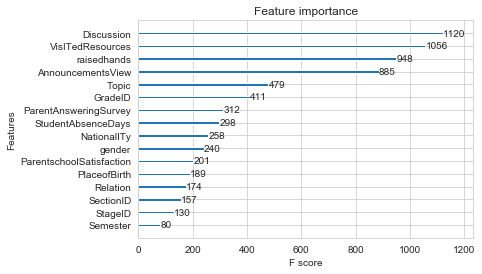

In [92]:
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print (classification_report(y_test,xgb_pred))
print("Accuracy = "+str(accuracy_score(y_test,xgb_pred)))
print("predicted set")
print(xgb_pred)
plot_importance(xgb)

Citations:

* Data from Kaggle >> Elaf Abu Amrieh, Thair Hamtini, and Ibrahim Aljarah, The University of Jordan, Amman, Jordan, http://www.Ibrahimaljarah.com www.ju.edu.jo
----
* Amrieh, E. A., Hamtini, T., & Aljarah, I. (2016). Mining Educational Data to Predict Student’s academic Performance using Ensemble Methods. International Journal of Database Theory and Application, 9(8), 119-136.
----
